In [1]:
# Fill in your name using the format below and student ID number
your_name = "Eljasiak, Adam"
student_id = "0965449"

In [2]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [3]:
# Uncomment the following line to run in Google Colab
# !pip install --quiet openml 

In [4]:
# Uncomment the following line to run in Google Colab
#%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
%matplotlib inline
import openml as oml
import math
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from packaging import version
import sklearn
import tensorflow
import keras
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Adam, Looks good. You may continue :)


Using TensorFlow backend.


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [7]:
#base_dir = '/content/drive/My Drive/TestAssignment' # For Google Colab
base_dir = 'C:\\Users\\Adam\\Documents\\uni\\Web Information Retrieval and Data Mining\\assignment-3-Susuowy'

In [8]:
#Uncomment to link Colab notebook to Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [9]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
#import os
#oml.config.cache_directory = os.path.expanduser('/content/cache')

In [10]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [11]:
from tensorflow.keras.utils import to_categorical
Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [12]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

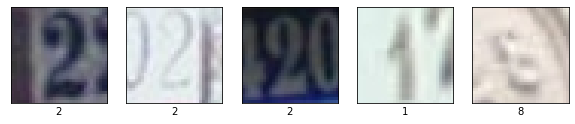

In [13]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [14]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 2048)              6293504   
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 12,598,282
Trainable params: 12,598,282
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.421239  0.448398 

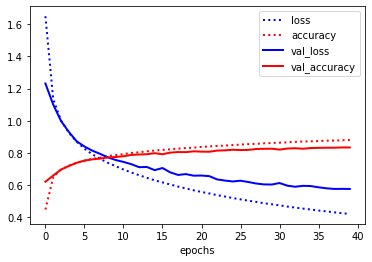

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten

def build_model_1_1():
    model = Sequential()
    model.add(Input(shape=(32,32,3)))
    model.add(Flatten())
    model.add(Dense(units=2048, activation='relu'))
    model.add(Dense(units=2048, activation='relu'))
    model.add(Dense(units=1024, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    
    model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=40, batch_size=32)

answer_q_1_1 = """I started by training 3-layer networks for 20 epochs with batch_size=128 and I determined that 2048/1024/512 offers good initial performance: val_acc=77%.
By more experiments I found that 2x2048+1024 gives val_acc=80%.
Using this network, batch size=32 offers good balance between val_acc=81.5% and training time.
Adagrad optimizer and 40 epochs gives val_acc=83%, which is decent considering possible future improvements."""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [16]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

# Replace with the preprocessed data
pre_X_train = rgb2gray(X_train)
pre_X_val = rgb2gray(X_val)
pre_X_test = rgb2gray(X_test)
preprocessed_split = pre_X_train, pre_X_val, y_train, y_val

Loading model from file
Success!
Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_55 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_271 (Dense)            (None, 2048)              2099200   
_________________________________________________________________
dense_272 (Dense)            (None, 2048)              4196352   
_________________________________________________________________
dense_273 (Dense)            (None, 1024)              2098176   
_________________________________________________________________
dense_274 (Dense)            (None, 10)                10250     
Total params: 8,403,978
Trainable params: 8,403,978
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.382439  0.519608

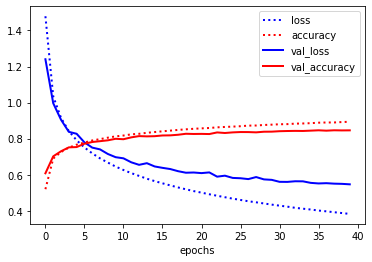

In [17]:
# Adjusted model
def build_model_1_2():
    model = Sequential()
    model.add(Input(shape=(32,32,1)))
    model.add(Flatten())
    model.add(Dense(units=2048, activation='relu'))
    model.add(Dense(units=2048, activation='relu'))
    model.add(Dense(units=1024, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    
    model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=40, batch_size=32)  
answer_q_1_2 = """This time I only had to remove color dimension from input shape in the model. Preprocessing provided additional 1,5% of val_acc, seeming to reach peak performance after 40 epochs.
It most likely occured because color information was not so relevant - images were blurry and colors were not rich. Anyway, there should be no correlation between digit and color.
After preprocessing dataset was compressed by 66%, which made the network receive less irrelevant data and focus on more important relations"""
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_33 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_98 (Dense)             (None, 2048)              2099200   
_________________________________________________________________
batch_normalization_51 (Batc (None, 2048)              8192      
_________________________________________________________________
dropout_34 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_99 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_52 (Batc (None, 2048)              8192      
_________________________________________________________________
dropout_35 (Dropout)

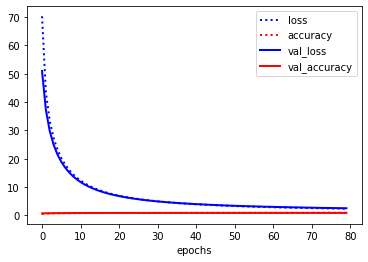

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras import regularizers

def build_model_1_3():
    model = Sequential()
    
    model.add(Input(shape=(32, 32, 1)))
    model.add(Flatten())
    
    model.add(Dense(units=2048, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(0.0001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(units=2048, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(0.0001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(units=1024, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(0.0001)))
    model.add(BatchNormalization())
    
    model.add(Dense(units=10, activation='softmax', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(0.0001)))
    
    model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=80, batch_size=32)

answer_q_1_3 = """L1_L2 regularization with a small penalty along with batch normalization allowed for more stable stable training and better generalization of the model.
Experiments with dropout shown that small values makes the training quicker - 86% val_acc was reached in 25 epochs for dropout=0.25 and in 50 epochs with dropot=0.5.
I decided to go for smaller dropout to reduce training period. Finally the model achieved 88% val_acc, which is satisfacory for a dense network."""
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 128)       1280      
_________________________________________________________________
batch_normalization_23 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
batch_normalization_2

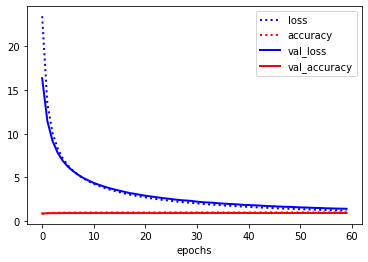

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras import regularizers

def build_model_2_1():
    model = Sequential()
    model.add(Input(shape=(32, 32, 1)))
              
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(0.0001), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(0.0001), padding='same'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(0.0001), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(0.0001), padding='same'))
    model.add(MaxPool2D(pool_size=(2, 2))) 
    model.add(BatchNormalization())

    model.add(Flatten())
    
    model.add(Dense(units=512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(0.0001)))
    model.add(Dense(units=128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(0.0001)))
    model.add(BatchNormalization())
    model.add(Dense(units=10, activation='softmax', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(0.0001)))
    
    model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=60, batch_size=64)

answer_q_2_1 = """I started with building unregularized model, that reached 91% val_acc. I made sure that there are enough filters in the 1st layer
(256) and next layers have more to compensate loss of resolution caused by padding and max pooling.
Changing dense part of the model did not influence val_acc much, given enough capacity (used 2048 units).
Then I regularized the model as in 1.3, getting siginficant boost in early training, finally it only provides 91,5% val_acc.
I introduced padding, since all pixels from small images matter and allow for deeper networks. Based on architecture of popular models, I doubled Conv2D layers to get 92% val_acc in 30 epochs.
Next I tried smaller number of units but 60 epochs, getting 93% val_acc."""
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Loading model from file
Success!
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 128)       1280      
_________________________________________________________________
batch_normalization_41 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
batch_normalization_4

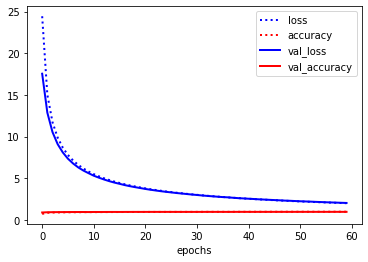

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data

batch_size_gen = 64
    
# No need to fit the generator, since I'm not using data-based transformations
train_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              fill_mode='nearest')

augmented_split = (train_gen.flow(pre_X_train, y_train, batch_size=batch_size_gen), pre_X_val, y_val)
run_evaluation("model_2_2", 
               build_model_2_1, 
               augmented_split, 
               base_dir, 
               train=False, 
               generator=True, 
               epochs=60, 
               batch_size=None,
               steps_per_epoch=math.floor(len(pre_X_train) / batch_size_gen))
answer_q_2_2 = """Fisrtly, I chose small values for transformations, since the dataset itself is on the edge of readability, and trained for 20 epochs.
I started with rotation alone which produced 94% val_acc.
Introducing H/V shift gave 95,5% val_acc, hovever zoom and shaer lowered it by 1%. Probalby numbers got too distorted, so I lowered the parameters.
It did not help, I reverted to initial three transformations. I noticed that H/V flips harm the model, since they produce symbols that are not digits anymore."""
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

19858/19858 [==============================] - 3s 161us/sample - loss: 2.0243 - accuracy: 0.9564
Test accuracy of model_3_1: 0.956390380859375
[[3667   25   11   24    9    9   29    6    5    7]
 [  21 2873   13    8    6    3    8    8    5    2]
 [  26   20 2155    5   33    7    6    8    8    8]
 [  39    6    6 1927    4    5    0    4    2    3]
 [  11    6   27    7 1772   19    2    1    8    0]
 [  13    3    3    5   28 1456    1   14    7   11]
 [  44   23   13    3    6    1 1430    1    1    1]
 [  11   10   14    4    6   24    3 1254   11    4]
 [   8    9   10    6   11    3    2   13 1174   15]
 [  15    6    1    3    1   10    1    5   12 1284]]
Answer is 792 characters long


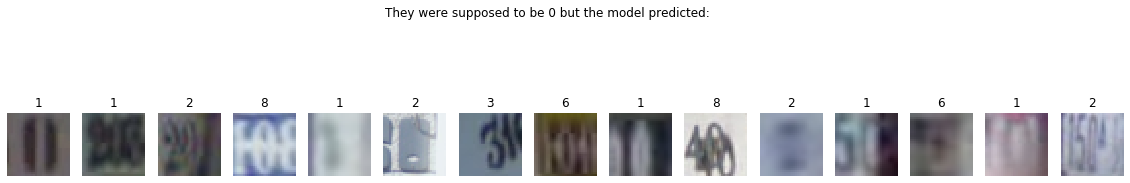

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

model_2_2 = load_model(os.path.join(base_dir, 'model_2_2.h5'))
predictions = np.argmax(model_2_2.predict(pre_X_test, batch_size=512), axis=1)

test_accuracy_3_1 = model_2_2.evaluate(pre_X_test, y_test, batch_size=256)[1] 
print(f'Test accuracy of model_3_1: {test_accuracy_3_1}') 

def plot_confusion_matrix():
    global predictions
    print(confusion_matrix(np.argmax(y_test, axis=1), predictions, list(range(10))))
    
plot_confusion_matrix()
    
def plot_misclassifications():
    global X_test, y_test, predictions
    DESIRED_CLASS = 0
    
    if DESIRED_CLASS == 0:
        desired_class_s = 9
    else:
        desired_class_s -= 1
    labels = np.argmax(y_test, axis=1)
    combined = np.vstack((labels, predictions))
    misclassified = np.where((combined[0, :] == desired_class_s) & (combined[0, :] != combined[1, :]))[0]
    NUM_DISPLAY = min(15, len(misclassified))
    np.random.shuffle(misclassified)
    misclassified = misclassified[:NUM_DISPLAY]
    
    fig, ax = plt.subplots(1, NUM_DISPLAY, figsize=(20, 4))
    fig.suptitle(f"They were supposed to be {str(DESIRED_CLASS)} but the model predicted:")
    
    for i, img in enumerate(misclassified):
        ax[i].imshow(X_test[img], interpolation='nearest')
        ax[i].set_title(f'{str((predictions[img] + 1) % 10)}')
        ax[i].axis('off')
    
plot_misclassifications()

answer_q_3_1 = """Model often mistakes (symetrically): 7 with 1, 4 with 1, 5 with 3, 8 with 6. In general, it mistakes digits with similar shapes.
I chose zeros to inspect. The first observation is that the images are mostly of terrible quality, leaving no other choice that to guess.
In the remaining cases images tend to be distorted enough to contain features that can confuse the network. For example, narrow 0 with single pixel of noise in the middle might be mistaken as 8.
Even more narrow 0 might be straight enough to become 1. Round sections in the bottom and noise in the top is mistaken as 6. There are also just wrong labels!
In my opinion the model is doing a great job guessing edge-cases, since most of them contain obvious visual clues that would be taken into consideration by humans as well."""
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

Answer is 497 characters long


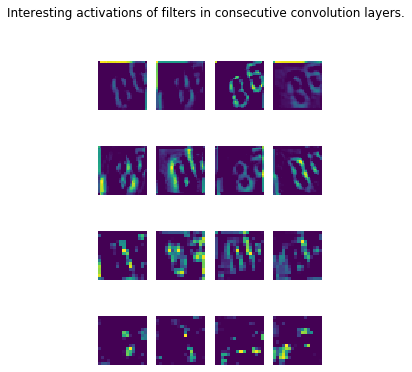

In [22]:
from tensorflow.keras.models import Model

def plot_activations():
    example = np.expand_dims(pre_X_test[0], 0)
    model_2_2 = load_model(os.path.join(base_dir, 'model_2_2.h5'))
    
    layer_outputs = [layer.output for layer in model_2_2.layers]
    activation_model = Model(inputs=model_2_2.input, outputs=layer_outputs)
    activations = activation_model.predict(example)
    
    
    conv_1_activations = activations[0]
    conv_2_activations = activations[2]    
    conv_3_activations = activations[5]
    conv_4_activations = activations[7]
    
    conv_activations = [conv_1_activations, conv_2_activations, conv_3_activations, conv_4_activations]

#     I used this to browse all the activations, uncomment to enable this plot as well
#     plt.imshow(example[0, :, :, 0], cmap='gray')
#     plt.title("First example")
    
#     fig, ax = plt.subplots(len(conv_activations), 30, figsize=(30, 6))
#     fig.suptitle('Activations of filters in consecutive convolution layers')
    
#     shift = 0
#     for i, conv_activation in enumerate(conv_activations):
#         for j in range(min(30, activations[i].shape[-1])):
#             ax[i, j].imshow(conv_activation[0, ..., j + 30 * shift])
#             ax[i, j].axis('off')
            
    interesting_activations_1 = [2, 7, 66, 46]
    interesting_activations_2 = [8, 56, 31, 59]
    interesting_activations_3 = [105, 119, 17, 102]
    interesting_activations_4 = [63, 54, 7, 28]
    
    interesting_activations = [interesting_activations_1, interesting_activations_2, interesting_activations_3, interesting_activations_4]
        
    fig, ax = plt.subplots(4, 4, figsize=(4, 6))
    fig.suptitle('Interesting activations of filters in consecutive convolution layers.')
    
    for i, (indices, layer_activations) in enumerate(zip(interesting_activations, conv_activations)):
        for j, interesting_activation in enumerate(indices):
            ax[i, j].imshow(layer_activations[0, ..., interesting_activation])
            ax[i, j].axis('off')
    

plot_activations()    
    

answer_q_3_2 = """The first convolution layer contain universal tools, like edge or solid body detectors.
2nd layer has similar filters and level of abstraction, but they look smoother than in the 1st.
Filters in the 3rd activate on more conceptual structures, like oval shapes or parts of uniform regions.
4th convolution layer is the least interpretable. We can observe two dots suggesting the number is 8, but also numerous maps that make sense only to the network.
Indeed, the model learned many useful filters."""
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

8


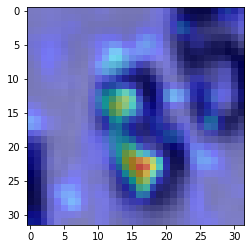

In [23]:
from keras import backend as K
import cv2

example_to_inspect = 0

def plot_activation_map():
    example = np.expand_dims(pre_X_test[example_to_inspect], 0)
    model = load_model(os.path.join(base_dir, 'model_2_2.h5'))
    
    predicted_class = np.argmax(model.predict(example))
    print(predicted_class + 1)
    
    last_conv_layer = model.layers[7]
    output_layer = model.output
    
    gradients = K.gradients(output_layer[:, predicted_class], last_conv_layer.output)[0]
    pooled_grads = K.mean(gradients, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([example])
    
    
    for i in range(last_conv_layer.filters):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = (heatmap * 255).astype('uint8')
    heatmap = cv2.resize(heatmap, (32, 32))
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

        
    plt.imshow(heatmap, alpha=0.5)
    

def plot_3_3():
    example = np.expand_dims(pre_X_test[example_to_inspect], 0)
    plt.imshow(example.reshape((32, 32)), cmap='gray', alpha=1)
    
    plot_activation_map()    
    plt.show()
    
    
plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

input_6 (None, 32, 32, 3) Trainable: False
block1_conv1 (None, 32, 32, 3) Trainable: False
block1_conv2 (None, 32, 32, 64) Trainable: False
block1_pool (None, 32, 32, 64) Trainable: False
block2_conv1 (None, 16, 16, 64) Trainable: False
block2_conv2 (None, 16, 16, 128) Trainable: False
block2_pool (None, 16, 16, 128) Trainable: False
block3_conv1 (None, 8, 8, 128) Trainable: False
block3_conv2 (None, 8, 8, 256) Trainable: False
block3_conv3 (None, 8, 8, 256) Trainable: False
block3_pool (None, 8, 8, 256) Trainable: False
block4_conv1 (None, 4, 4, 256) Trainable: False
block4_conv2 (None, 4, 4, 512) Trainable: False
block4_conv3 (None, 4, 4, 512) Trainable: False
block4_pool (None, 4, 4, 512) Trainable: False
block5_conv1 (None, 2, 2, 512) Trainable: True
block5_conv2 (None, 2, 2, 512) Trainable: True
block5_conv3 (None, 2, 2, 512) Trainable: True
block5_pool (None, 2, 2, 512) Trainable: True
Model: "sequential_5"
_________________________________________________________________
Layer (

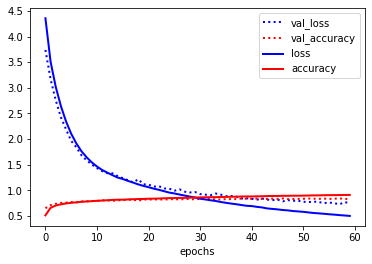

In [24]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adagrad, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_model_4_1():
    
    model = Sequential()
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
        
    # The last one is max pooling so start from -2 to see any effects. Next max pooling is at -5
    for l in vgg16.layers[:-4]:
        l.trainable = False
    
    for l in vgg16.layers:
        print(l.name, l.input.shape, 'Trainable:', l.trainable)
    
    model.add(vgg16)
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(0.0001)))
    model.add(BatchNormalization())
    model.add(Dense(units=10, activation='softmax', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(0.0001)))

    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.00001), metrics=['accuracy'])
    model.summary()
    return model

    
# No need to fit the generator, since I'm not using data-based transformations
vgg_train_gen = ImageDataGenerator(rotation_range=20,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  fill_mode='nearest')

vgg_augmented_split = (vgg_train_gen.flow(X_train, y_train, batch_size=64), X_val, y_val)

run_evaluation("model_4_1", 
               build_model_4_1, 
               vgg_augmented_split, 
               base_dir, 
               train=False, 
               generator=True, 
               epochs=60, 
               batch_size=None,
               steps_per_epoch=math.floor(len(pre_X_train) / 64))

answer_q_4_1 = """Freezing whole VGG16 with one hidden dense layer with 512 units gave 55% val acc.
RMSprop was used because smaller learning rate have to be used, which is discouraged in Adagrad. 
I unfroze last 3 convolution layers of vgg16 and using lr=1e-5 it acheved 81% val_acc.
Finally, data augmentation from 2.2 was re-used, but it resulted only in 83,5% val_acc.
The performance is not satisfactory, VGG16 was trained on all kinds of iamges which contain features that are not relevant to digit recognition."""
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [25]:
import pickle
import gzip
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


def store_embedding(X, name):  
    with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
        pickle.dump(X, file_pi)
    

def load_embedding(name):
    with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
        return pickle.load(file_pi)


def store_embeddings():
    """ Stores all necessary embeddings to file """
    model = load_model(os.path.join(base_dir, 'model_4_1.h5'))
    # Get only convolution base
    model = model.layers[0]
    model = Model(model.input, model.output)
    
    print('Fitting PCA...')
    X_train_e = model.predict(X_train, batch_size=512)
    
    if USE_PCA:
        pca = PCA(250)
        pca.fit(reshape_output(X_train_e))
    
    model.summary()
    
    if 'train_embedding.p' not in os.listdir():
        print('Saving training embeddings...')
        if USE_PCA: 
            X_train_e = pca.transform(reshape_output(X_train_e))
        store_embedding(X_train_e, 'train')
        del X_train_e
    
    if 'val_embedding.p' not in os.listdir():
        print('Saving validation embeddings...')
        X_val_e = model.predict(X_val, batch_size=512)
        if USE_PCA:
            X_val_e = pca.transform(reshape_output(X_val_e))
        store_embedding(X_val_e, 'val')
        del X_val_e
    
    if 'test_embedding.p' not in os.listdir():
        print('Saving testing embeddings...')
        X_test_e = model.predict(X_test, batch_size=512)  
        if USE_PCA:
            X_test_e = pca.transform(reshape_output(X_test_e))
        store_embedding(X_test_e, 'test')
        del X_test_e
    

def reshape_output(x):
    temp = np.copy(x)
    return temp.reshape(temp.shape[0], np.prod(temp.shape[1:]))
    

def generate_pipeline():
    """ Returns an sklearn pipeline. """
    # Match input format of sklearn classifiers
    reshape = FunctionTransformer(reshape_output)
    classifer = RandomForestClassifier(100, verbose=2, n_jobs=-1)
    steps = [('scaler', StandardScaler()),
             ('classifier', classifer)]
    if not USE_PCA:
        steps = [('reshaper', FunctionTransformer(reshape_output))] + steps
    pipeline = Pipeline(steps=steps, verbose=False)
    return pipeline
    

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
    """ Evaluates the given pipeline, trained on the given embedded training set and 
    evaluated on the supplied embedded test set. Returns the accuracy score. """
    fit_pipeline = pipeline.fit(X_train, y_train)
    return fit_pipeline.score(X_test, y_test)
    

def evaluation_4_2(X_train, y_train, X_test, y_test):
    """ Runs 'evaluate_pipeline' with embedded versions of the input data 
    and returns the accuracy. """
    pipeline = generate_pipeline()
    score = evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test)
    print(f'Validation accuracy: {score}')
    return score

 
def full_evaluation():
    if len(set(('train_embedding.p', 'val_embedding.p', 'test_embedding.p')).intersection(set(os.listdir()))) < 3:
        print('Some embeddings not found in the folder, generating and storing them.')
        store_embeddings()
    else:
        print("All embeddings found, lodaing.")

    X_train_e = load_embedding('train')
    X_val_e = load_embedding('val')
    X_test_e = load_embedding('test')
    
    evaluation_4_2(X_train_e, y_train, X_test_e, y_test)
    
    
USE_PCA = False
full_evaluation()


answer_q_4_2 = """Neural networks are unbeatable at image recognition so I expected worse accuracy, but not 71%!
I extract embeddings from the last convolution layer and pass it through a pipeline.
It consists of scaler - useful for deeper, less normalized layers, reshaper to flatten the data and random forest classifier.
Poor perfomance might be caused by random forest not considering spatial relations of data and not fully understanding the purpose of these embeddings."""

print("Pipeline:", generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

All embeddings found, lodaing.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.0s


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s


Validation accuracy: 0.7184510021150167
Pipeline: Pipeline(memory=None,
         steps=[('reshaper',
                 FunctionTransformer(accept_sparse=False, check_inverse=True,
                                     func=<function reshape_output at 0x0000022342A96438>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, validate=False)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                 

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
